In [10]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Load in the dataframe
df = pd.read_csv("mentalhealth.csv")
# Looking at first 5 rows of the dataset
df.head()

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
rt = re.compile('(\s*)rt(\s*)')
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    lower_case = rt.sub('', lower_case)
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

print("Cleaning and parsing the reviews...\n")
clean_tweets = []
for i in df.Tweet:
    clean_tweets.append(tweet_cleaner(i))
print("done")

Cleaning and parsing the reviews...

done


In [13]:
tweet_clean = ' '.join([w for w in clean_tweets if len(w)>3])

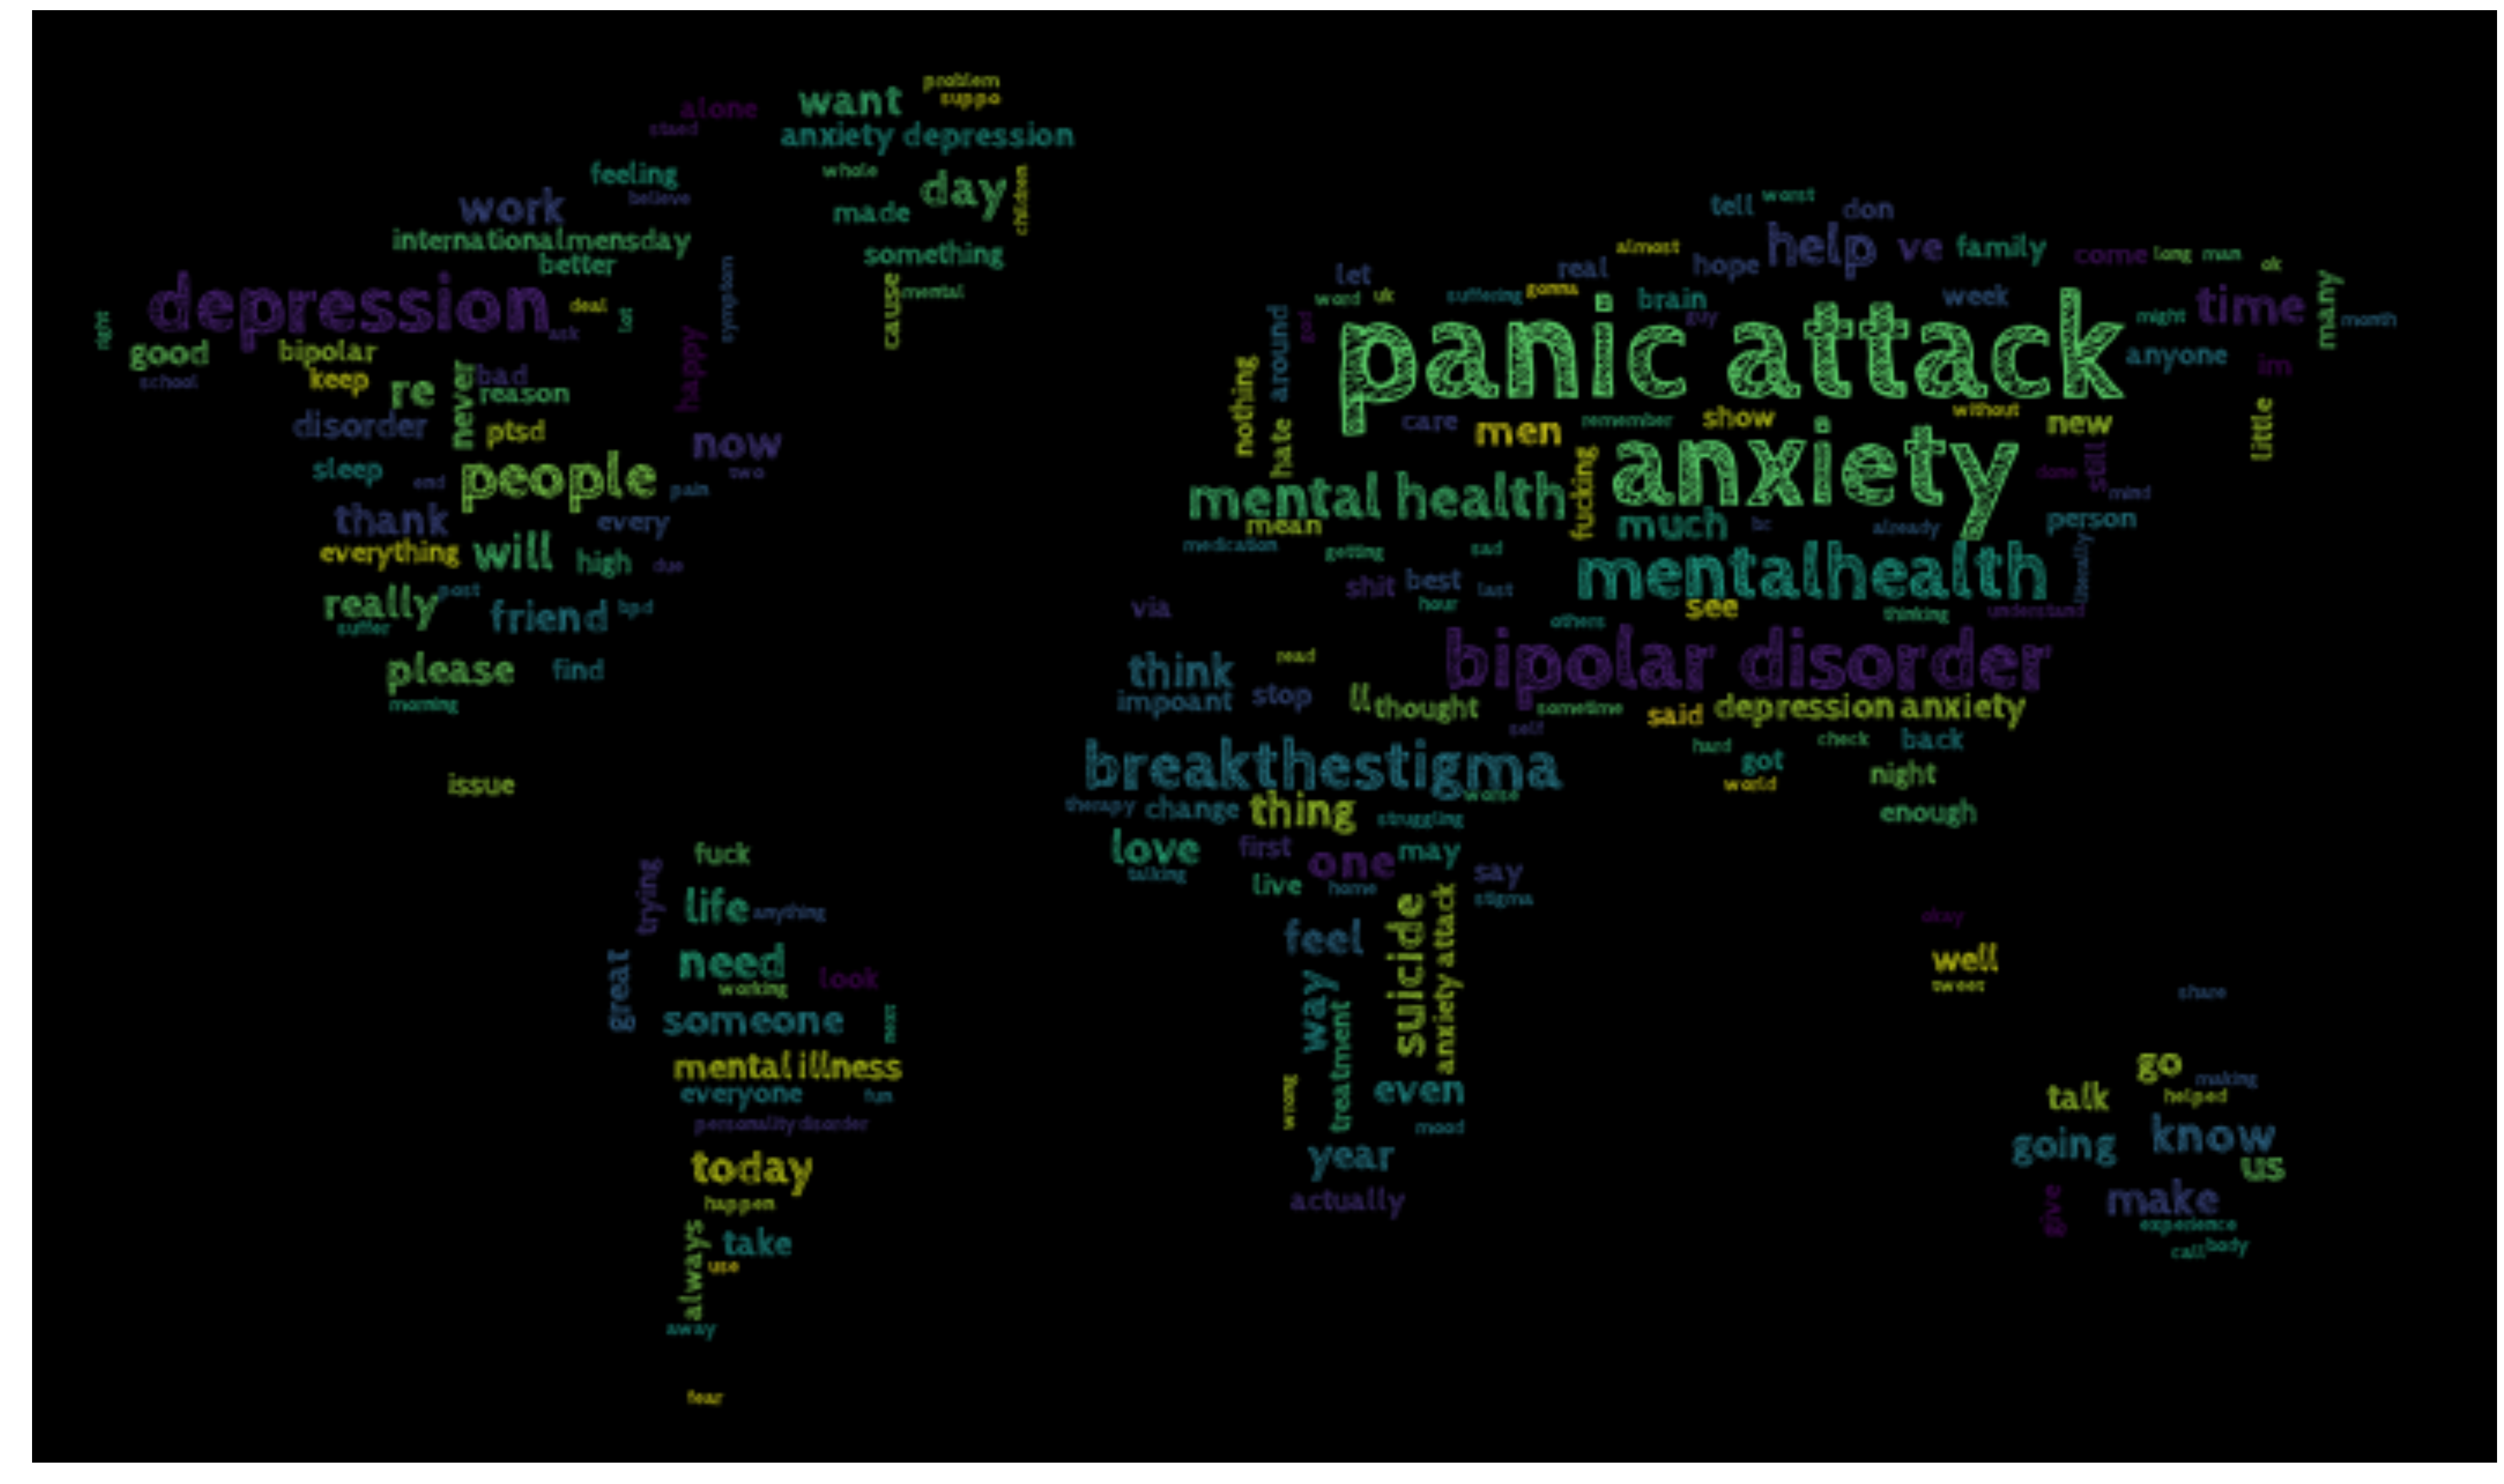

In [29]:
mask = np.array(Image.open("wm_mask.jpg"))
from os import getcwd
d = getcwd()
mask = np.array(Image.open(path.join(d, "wm_mask.jpg")))
wc = WordCloud(font_path='CabinSketch-Bold.ttf',
               mask=mask,random_state=42, max_font_size=100)
wc.generate(tweet_clean)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[40,25])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
_=plt.show()

wc.to_file("wordcloud_tweet.png")

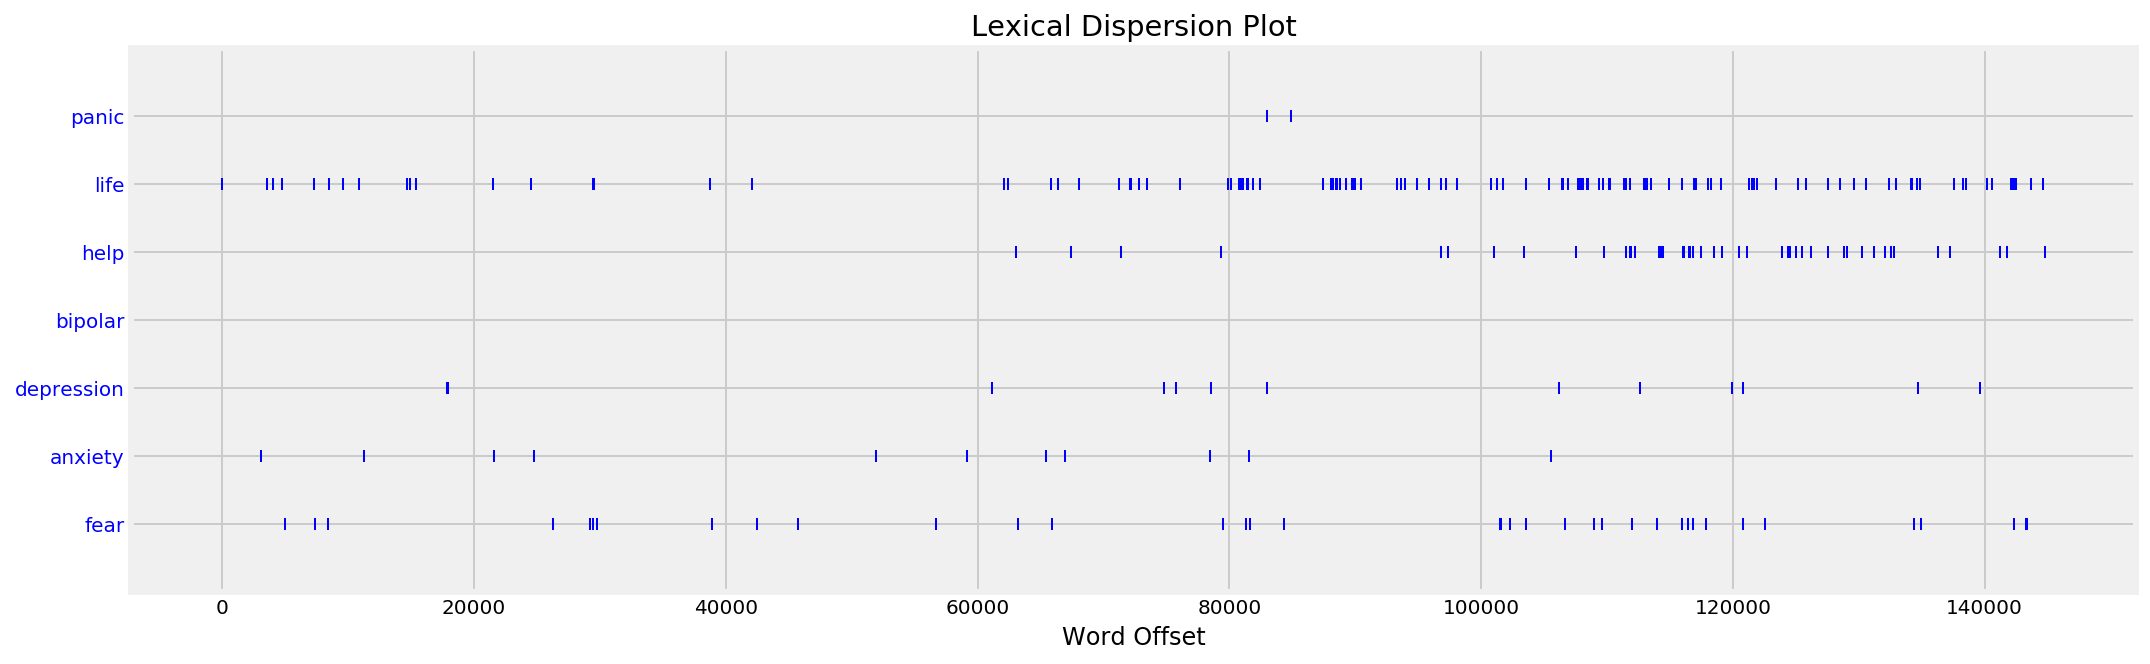

In [43]:
from  nltk.book import text4 as inaugural_speeches
plt.figure(figsize=(16,5))
topics = ['panic', 'life', 'help', 'bipolar', 'depression','anxiety','fear']
inaugural_speeches.dispersion_plot(topics)

In [41]:
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Rohini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.


True